<a href="https://colab.research.google.com/github/Molashhs/spotifyTCS/blob/main/DSRP_Spotify_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQmfwC6rSgzudX7RUqTsBlCREZZ68yVQQRqI7otYj1Zkajk-y_iUfI80sSPlk6UftjdrU0z3hbJQ_F-/pub?output=csv"
spotify=pd.read_csv(url)

In [ ]:
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [ ]:
spotify.dropna()
spotify.drop_duplicates()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
#potential reasearch question = does the amount of spotify playlist the song is included affect the raning in charts

Text(0.5, 1.0, 'Amount of Playlist vs Rank in Charts')

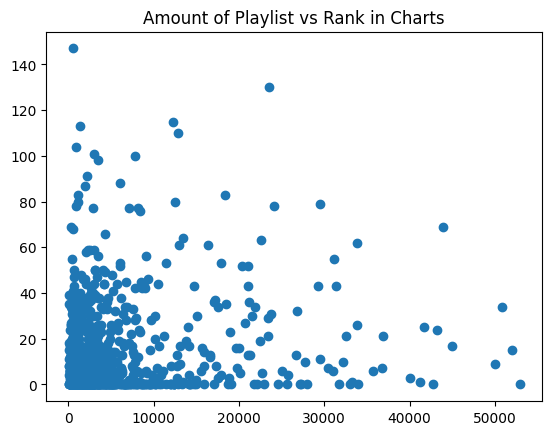

In [ ]:
plt.scatter(spotify['in_spotify_playlists'], spotify['in_spotify_charts'])
plt.title("Amount of Playlist vs Rank in Charts")

In [ ]:
#new idea for research queston. I could see whcih factors affect the dancibility percentage the most. Maybe like BPM, Energy, and Mode

In [ ]:
x1=(spotify['bpm'])
x2=(spotify['energy_%'])
x3=(spotify['speechiness_%'])
y0=(spotify['danceability_%'])

### Made a visualization fo what the comparisons could look like but due to mode not being a nurmeric it made a weird chat, even so chart befor i added mode worked better have both BPM and Energy level on same place so yay.

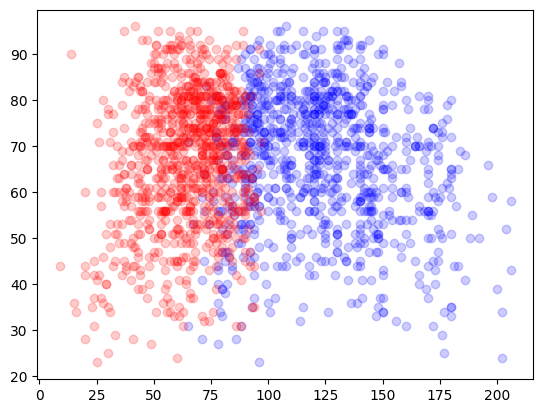

In [ ]:
plt.scatter(x1,y0,color='blue',label="Chart1", alpha=0.2)
plt.scatter(x2,y0,color='red',label="Chart2", alpha=0.2)

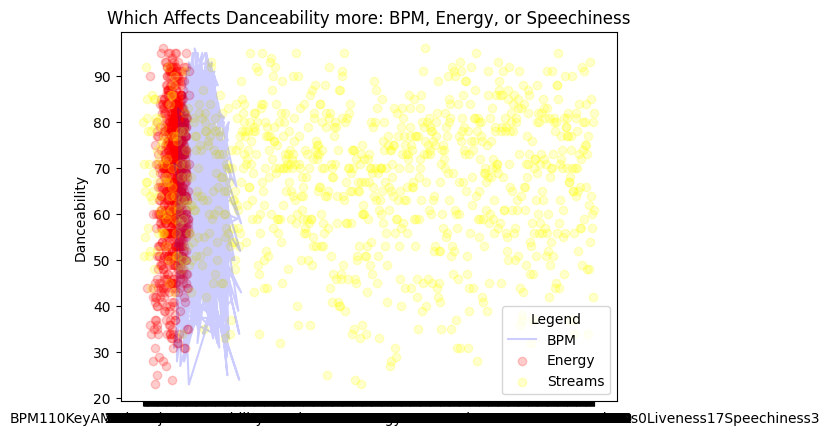

In [ ]:
plt.plot(spotify['bpm'], y0, color='blue', label="BPM", alpha=0.2)
plt.scatter(spotify['energy_%'], y0, color='red', label="Energy", alpha=0.2)
plt.scatter(spotify['streams'], y0, color='yellow', label="Streams", alpha=0.2)
plt.ylabel("Danceability")
plt.title("Which Affects Danceability more: BPM, Energy, or Speechiness")
plt.legend(title="Legend")
plt.show()

In [ ]:
#I might change it to a line graph instead of a scatter plot isntead
#Sad choice energy might not be the best since it also correlates with bpm since energy is messured with bpm so possible problem

In [ ]:
new_mode = {"Major": range(1,10), "Minor": range(0,-10)}
spotify["mode"] = spotify["mode"].map(new_mode)
print(new_mode)

{'Major': range(1, 10), 'Minor': range(0, -10)}


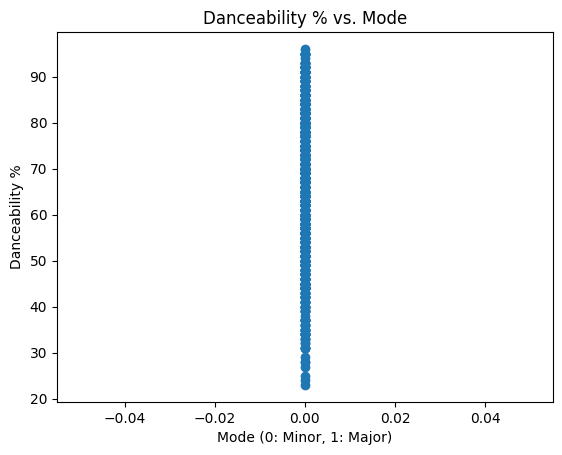

In [ ]:
plt.scatter(spotify['mode'], y0)
plt.xlabel("Mode (0: Minor, 1: Major)")
plt.ylabel("Danceability %")
plt.title("Danceability % vs. Mode")
plt.show()

I've come to realize that Mode might not be the best to use in my analysis so i will probably be dropping it for something else, I'm thinking maybe streams or maybe speechniness but as seen above I dont know if they'll be the best.

idead make take random amount of songs and analyze these factors: example randome sample of songs say 50 or 100 will be take and look at their dpm, energy, and streams instead of taking all 900+ songs and making the graph look ugly. though I dont know how I'll do it thats hopefully the plan.

Update new idea as well try a bar graph as well with showing how much each each affect it.

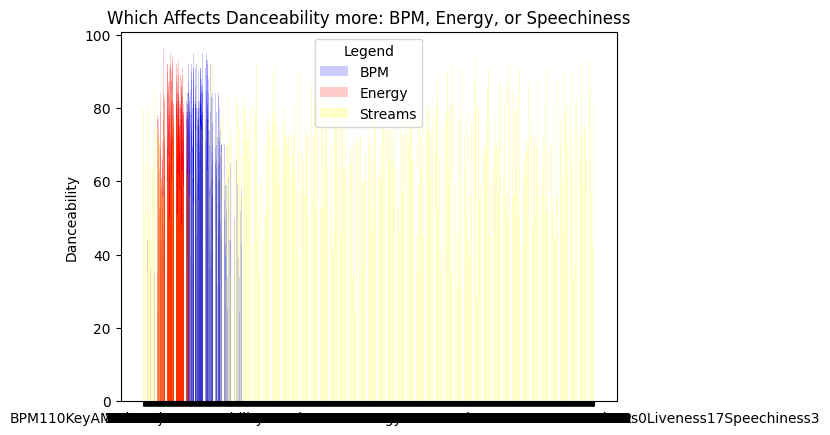

In [ ]:
plt.bar(spotify['bpm'], y0, color='blue', label="BPM", alpha=0.2)
plt.bar(spotify['energy_%'], y0, color='red', label="Energy", alpha=0.2)
plt.bar(spotify['streams'], y0, color='yellow', label="Streams", alpha=0.2)
plt.ylabel("Danceability")
plt.title("Which Affects Danceability more: BPM, Energy, or Speechiness")
plt.legend(title="Legend")
plt.show()

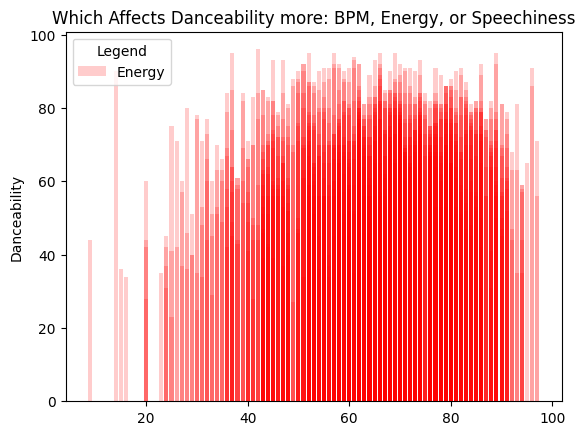

In [ ]:
plt.bar(spotify['energy_%'], y0, color='red', label="Energy", alpha=0.2)
plt.ylabel("Danceability")
plt.title("Which Affects Danceability more: BPM, Energy, or Speechiness")
plt.legend(title="Legend")
plt.show()

<BarContainer object of 953 artists>

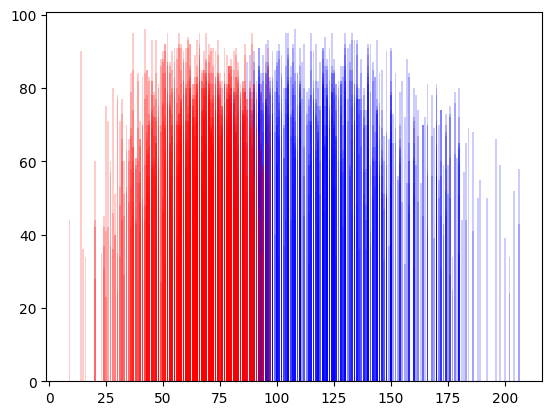

In [ ]:
plt.bar(x1,y0,color='blue',label="Chart1", alpha=0.2)
plt.bar(x2,y0,color='red',label="Chart2", alpha=0.2)